# Fake news detection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib.pyplot is to plot 2D graphs.

### Reading datasets.

In [2]:
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/true.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

### Combining the both the data sets. Adding a the coloumn target as a flag to identify the news

In [5]:
fake['target'] = 'fake'
true['target'] = ' true'

In [6]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [8]:
# shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop = True)

In [9]:
data.head()

,title,text,subject,date,target
0,Britain declines to comment on reported death ...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,"October 12, 2017",true
1,AZ POLICE OFFICER Goes To Trump Rally…Shocked ...,This police officer is a class act. He went to...,politics,"Mar 20, 2016",fake
2,Exclusive: Atlantic City emergency fiscal mana...,(Reuters) - New Jersey taxpayers will owe $2.6...,politicsNews,"January 15, 2016",true
3,"Forbidden in China, but Trump skirts 'Great Fi...",BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 9, 2017",true
4,White House says Iran's progress on nuclear de...,WASHINGTON (Reuters) - Iran has made important...,politicsNews,"January 15, 2016",true


### Removing the date and title as we wont be using it for analysis.

In [10]:
data.drop(["date"],axis = 1, inplace = True)
data.head()

,title,text,subject,target
0,Britain declines to comment on reported death ...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,true
1,AZ POLICE OFFICER Goes To Trump Rally…Shocked ...,This police officer is a class act. He went to...,politics,fake
2,Exclusive: Atlantic City emergency fiscal mana...,(Reuters) - New Jersey taxpayers will owe $2.6...,politicsNews,true
3,"Forbidden in China, but Trump skirts 'Great Fi...",BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,true
4,White House says Iran's progress on nuclear de...,WASHINGTON (Reuters) - Iran has made important...,politicsNews,true


In [11]:
data.drop(["title"], axis = 1, inplace = True)
data.head()

,text,subject,target
0,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,true
1,This police officer is a class act. He went to...,politics,fake
2,(Reuters) - New Jersey taxpayers will owe $2.6...,politicsNews,true
3,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,true
4,WASHINGTON (Reuters) - Iran has made important...,politicsNews,true


### Convert lowercase.

In [12]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,london (reuters) - prime minister theresa may ...,worldnews,true
1,this police officer is a class act. he went to...,politics,fake
2,(reuters) - new jersey taxpayers will owe $2.6...,politicsNews,true
3,beijing (reuters) - u.s. president donald trum...,politicsNews,true
4,washington (reuters) - iran has made important...,politicsNews,true


In [13]:
# Removing punctuations:

import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data.head()

,text,subject,target
0,london reuters prime minister theresa may s s...,worldnews,true
1,this police officer is a class act he went to ...,politics,fake
2,reuters new jersey taxpayers will owe 262 mil...,politicsNews,true
3,beijing reuters us president donald trump wen...,politicsNews,true
4,washington reuters iran has made important pr...,politicsNews,true


In [14]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elroy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,london reuters prime minister theresa may spok...,worldnews,true
1,police officer class act went trump rally chec...,politics,fake
2,reuters new jersey taxpayers owe 262 million r...,politicsNews,true
3,beijing reuters us president donald trump went...,politicsNews,true
4,washington reuters iran made important progres...,politicsNews,true


### Basic data exploration.

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


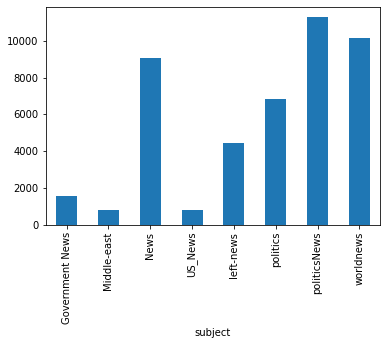

In [16]:
# Count of the articles depending on the subjects.
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
 true    21417
fake     23481
Name: text, dtype: int64


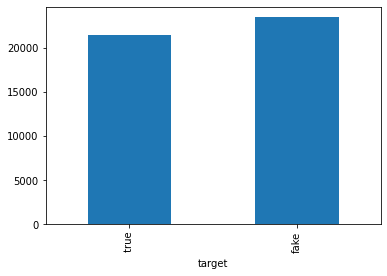

In [17]:
# Count of the articles depending on the target(real/fake).
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

#### Creating WordCloud for data exploration.

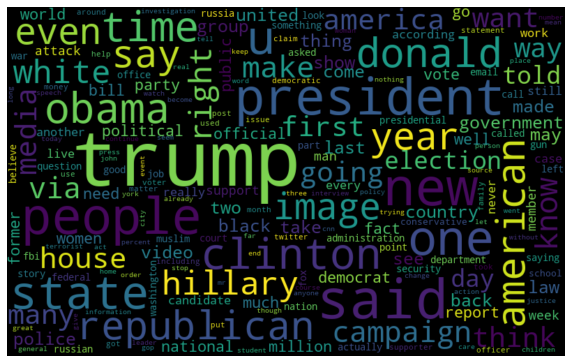

In [18]:
# fake news WordCloud.
from wordcloud import WordCloud

fake_data = data[data['target'] == "fake"]
all_words = ' '.join([text for text in fake_data.text]) ##fake_data.text

wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

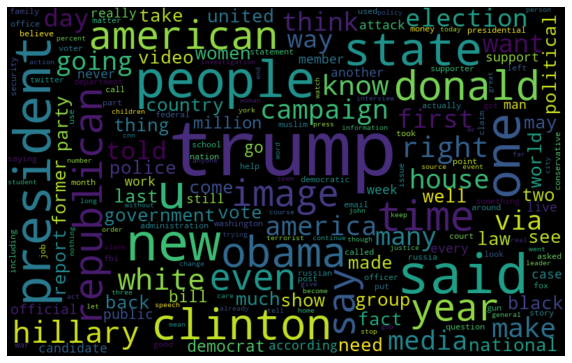

In [19]:
# Real news WordCloud.
from wordcloud import WordCloud

real_data = data[data['target'] == " true"]
all_word = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Most frequesnt words counter
# tokenize is used convert word from a string into individual tokens.
# df.nlargest() is used to the n largest in the DataFrame.
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer() 

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    #print(df_frequency)
    df_frequency = df_frequency.nlargest(n = quantity, columns = "Frequency")
    plt.figure(figsize = (12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "count")
    plt.xticks(rotation = 'vertical') 
    plt.show()
    
#plt.xticks(rotation = 'vertical') This is done so that the name of each item vericallyi instead of horizontal.

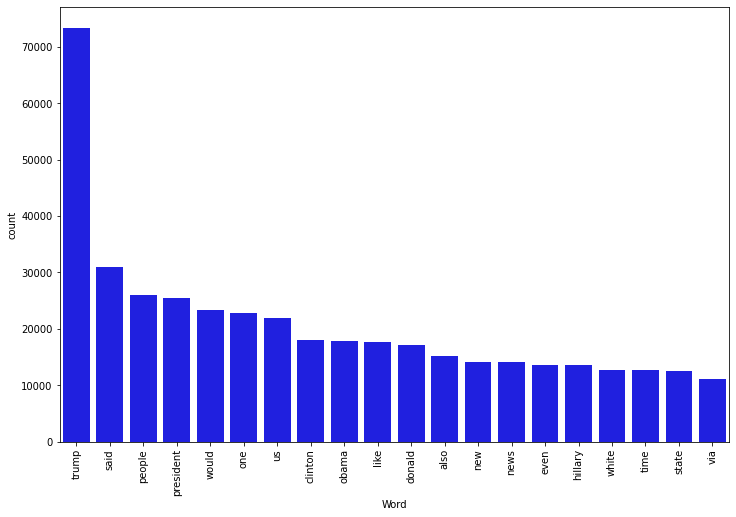

In [21]:
# Top 20 frequent words used in fake news.
counter(data[data["target"] == "fake"], "text", 20)

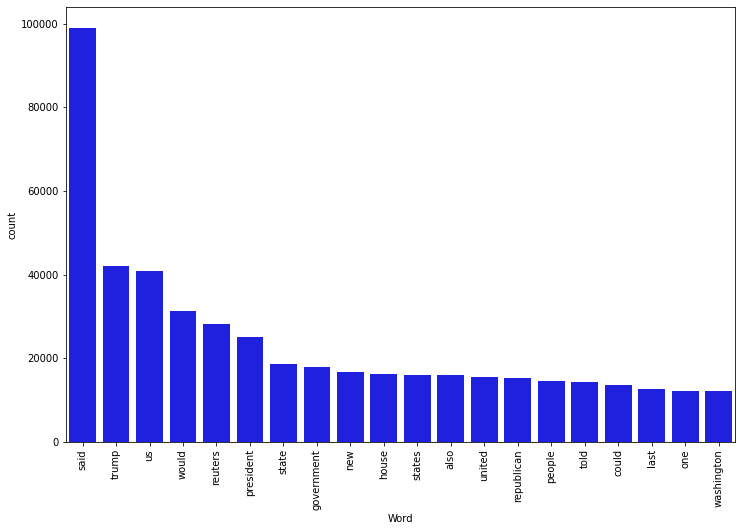

In [22]:
# Top 20 frequent words used in real news.
# print(data.head())
counter(data[data["target"] == " true"], "text", 20)

## Modeling

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [24]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Perparing the data (creating test and training data)

In [25]:
# Spliting the data.
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.target, test_size = 0.2, random_state = 42)

# train_test_split(name_of_the_columns_from_dataFrame, Name_of_the_target_column, test_size .2=20% test data, random_state =number)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', lr)])

#fitting the model
model = pipe.fit(x_train, y_train)

#Accuracy
prediction = model.predict(x_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

Accuracy: 98.92%


Confusion matrix, without normalization


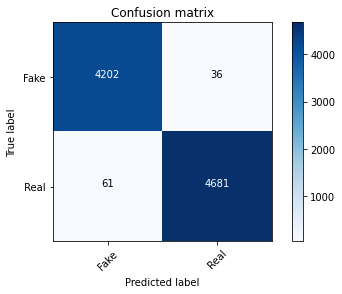

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', ' Real'])

### Decision tree classifier.

In [28]:
from sklearn.tree import DecisionTreeClassifier

#Vectorizing and applying TD-IDF
#  DecisionTreeClassifier(criterion = 'entropy'/'gini', max_depth = 200, splitter = 'best'/'random', random_state = 3)
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 140, splitter = 'best', random_state = 5)
pipe = Pipeline([('vect', CountVectorizer()), 
                 ('tfidf', TfidfTransformer()), 
                 ('model', dtc)])

#Fitting the model
model = pipe.fit(x_train, y_train)

#Accuracy
prediction = model.predict(x_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

Accuracy: 99.68%


Confusion matrix, without normalization


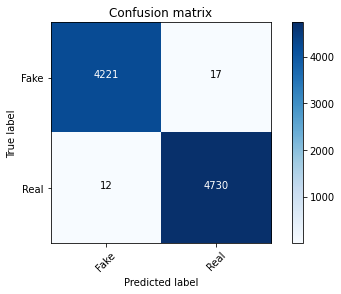

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 85, criterion = "entropy")
pipe = Pipeline([('vect', CountVectorizer()), 
                 ('tfidf', TfidfTransformer()), 
                 ('model', rfc)])

#fitting the model.
model = pipe.fit(x_train,y_train)

#Accuracy.
prediction = model.predict(x_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

Accuracy: 99.24%


Confusion matrix, without normalization


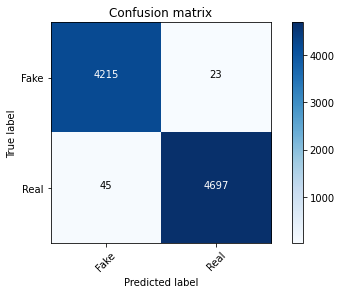

In [41]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])